# 분류분석

<br>

## 이진 분류(Binary Classification) & 시그모이드 함수 (Sigmoid function)

- 로지스틱 회귀를 풀기 위한 가설
- **시그모이드 함수는 입력값이 커지면 1에 수렴하고, 입력값이 작아지면 0에 수렴**
- **0부터의 1까지의 값을 가지는데 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)로 만들면 이진 분류 문제를 풀기 위해서 사용**

$$H(x) = {1 \over {1+e^{-(wx+b)}}} = sigmoid(wx+b) = σ(wx+b)$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

<br>


- $w$는 1, $b$는 0임을 가정:
  $$H(x) = {1 \over {1+e^{-x}}}$$

- 그래프에서 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환 (S자의 모양)
- $x$가 0일 때 출력값은 0.5의 값을 가지며, $x$가 증가하면 1에 수렴.

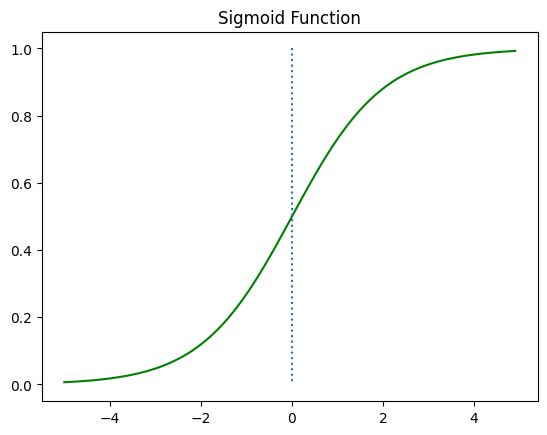

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

<br>

- 가중치 $w$이 출력값에 어떤 영향을 미치는지 시각화
  * 그래프는 $w$의 값이 0.5일때 빨간색선, $w$의 값이 1일때는 초록색선, $w$의 값이 2일때 파란색선
  * **$w$의 값에 따라 그래프의 경사도가 변경**.
  - **선형 회귀에서 직선을 표현할 때, 가중치는 직선의 기울기를 의미했지만, 시그모이드에서는 경사도를 결정** 
  - $w$ 의 값이 커지면 경사가 커지고, $w$의 값이 작아지면 경사가 감소

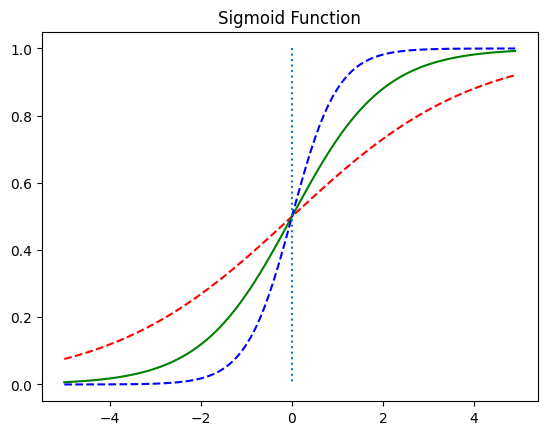

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

<br>

- 편향 $b$ 출력값에 어떤 영향을 미치는지 시각화

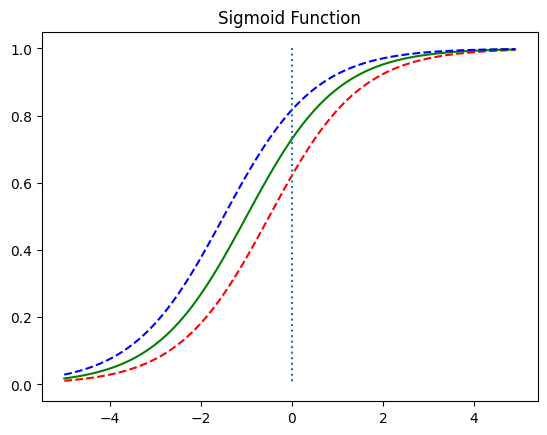

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

<br>

<br>

## 비용 함수(Cost function)
- 로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 $w$를 찾아내지만, **비용 함수로는 MSE를 사용하지 않음**
- **MSE를 로지스틱 회귀의 비용 함수로 사용했을 때, 지역 최소값 (Local Minimum)에 빠질 가능성이 지나치게 증가**

<br>

#### **지역 최소값** : 특정 구역에서의 최소값
#### **전역 최소값** : 전체 함수에 걸쳐 최소값

![로지스틱회귀1[1].JPG](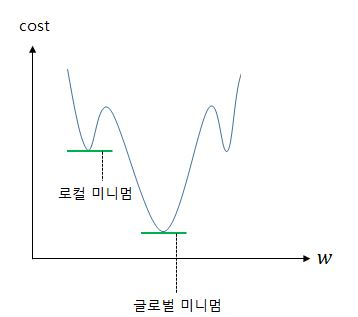)

<br>

* 로지스틱 회귀라는 문제에서 가중치 $w$를 최소로 만드는 적절한 새로운 비용 함수가 필요
  -  가중치를 최소화하는 아래의 **목적 함수 $J$**
  - **$n$** : 샘플 데이터의 개수
  - **$f$** **: 실제값 $y_i$와 예측값 $H(x_i)$의 오차를 나타내는 비용함수 (Cost function)**

  $$J(w) = {1 \over n} \sum^n_{i=1} f(H(x^{(i)}, y^{(i)})$$

  - 시그모이드 함수는 0과 1사이의 $y$값을 반환:
    * **실제값이 0일 때, $y$값이 1에 가까워지면 오차가 커지며, 실제값이 1일 때 $y$값이 0에 가까워지면 오차가 커짐을 의미**
    * 이를 반영할 수 있는 함수는 로그함수를 통해 표현 가능

    $$if \ y=1 → Cost(H(x), y) = -log(H(x))$$
    $$if \ y=0 → Cost(H(x), y) = -log(1-H(x))$$

<br>

* $y$의 실제값이 1일 때 $-log(H(x))$ (파란색)
  * 실제값이 1일 때, 예측값 $H(x)$이 1이면, 오차가 0이므로 비용함수 Cost는 0
- $y$의 실제값이 0일 때 $-log(1-H(x))$ (빨간색)
  * 실제값이 0일 때, $H(x)$가 0으로 수렴하면 Cost는 0  

<br>

#### $y$가 0이면 $y\;log(H(x))$가 소거되고, $y$가 1이면 $(1-y)log(1-H(x))$가 없어지는 형태

  <br>

  $$Cost(H(x), y) =  -[y\;log(H(x)) + (1-y)log(1-H(x))]$$

  $$J(w) = -{1 \over n}[y^{(i)} log(H(x^{(i)}))+(1-y^{(i)})log(1-H(x^{(i)}))$$

  <br> 

  ![로지스틱회귀2[1].JPG](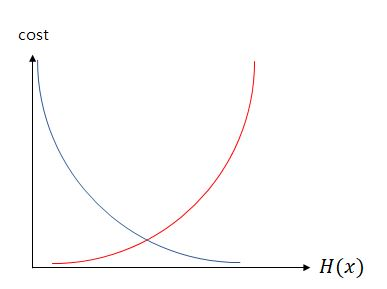)

<br>

#### 로지스틱 회귀에서 찾아낸 비용함수 $\rightarrow$ **크로스 엔트로피 (Cross Entropy)**
  - 결론적으로 로지스틱 회귀는 비용함수로 크로스 엔트로피 함수를 사용하며
  - **가중치를 찾기 위하여 크로스 엔트로피 함수의 평균을 취한 함수를 사용**

<br>

<br>

# 벡터, 행렬, 텐서

<br>

## 벡터와 행렬과 텐서
- **벡터 (vector)**
  - 크기와 방향을 가진 양
  - 숫자가 나열된 형상이며 파이썬에서는 1차원 배열 또는 리스트로 표현
- **행렬 (array)**
  - 행과 열을 가지는 2차원 형상을 가진 구조
  - 파이썬에서는 2차원 배열로 표현
  - 가로줄을 행(row)라고 하며, 세로줄을 열(column)
  
- **텐서 (tensor)**
  - 파이썬에서는 3차원 이상의 배열로 표현

<br>

<br>

## 텐서 (Tensor)
- 인공 신경망은 복잡한 모델 내의 연산을 주로 행렬 연산을 통해 해결
- **행렬 연산이란 단순히 2차원 배열을 통한 행렬 연산만을 의미하는 것이 아닌, 머신 러닝의 입/출력이 복잡해지면 3차원 텐서에 대한 이해가 필수로 요구됨.**
  - e.g 인공 신경망 모델 중 하나인 RNN에서는 3차원 텐서에 대한 개념 이해가 필수

In [5]:
import numpy as np

<br>

### 스칼라 : 0차원 텐서
- 스칼라는 하나의 실수값으로 이루어진 데이터를 (0차원 텐서)

In [7]:
d = np.array(5)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


<br>

### 벡터 : 1차원 텐서
- 벡터는 1차원 텐서
- **벡터의 차원과, 텐서의 차원은 다른 개념**
  - **벡터에서의 차원은 하나의 축에 놓인 원소의 개수를 의미**
  - **텐서에서의 차원은 축의 개수를 의미**

In [8]:
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


<br>

### 행렬 : 2차원 텐서
- 행과 열이 존재하는 벡터의 배열. (행렬(matrix), 2차원 텐서)
- **텐서의 크기** :
  - 각 축을 따라서 얼마나 많은 차원이 있는지를 나타낸 값

In [9]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


<br>

### 다차원 배열 : 3차원 텐
- 데이터 사이언스 분야 한정으로 주로 3차원 이상의 배열을 텐서라고 부른다고 이해
- 3D 텐서는 시퀀스 데이터(sequence data)를 표현할 때 자주 사용
  - 시퀀스 데이터는 주로 단어의 시퀀스를 의미하며, 시퀀스는 주로 문장이나 문서, 뉴스 기사 등의 텍스트

In [10]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


<br>

### 그 이상의 차원
![tensor[1].png](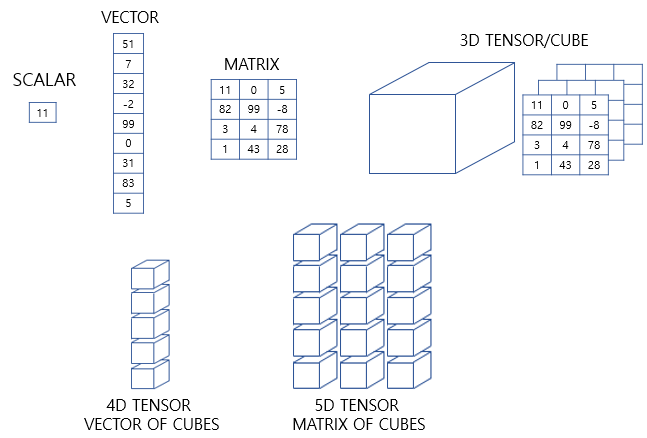)

<br>

<br>

## 벡터와 행렬의 연산 

<br>

### 벡터와 행렬의 덧셈과 뺄셈
#### **벡터의 요소별(element-wise) 연산**
- 같은 크기의 두 개의 벡터나 행렬은 덧셈과 뺄셈이 가능
  - 이 경우 같은 위치의 원소끼리 연산

$$A = \left[
    \begin{array}{c}
      8 \\
      4 \\
      5 \\
    \end{array}
  \right]
\ \ 
B = \left[
    \begin{array}{c}
      1 \\
      2 \\
      3 \\
    \end{array}
  \right]$$

<br>

$$A + B = \left[
    \begin{array}{c}
      8 \\
      4 \\
      5 \\
    \end{array}
  \right]
+ \left[
    \begin{array}{c}
      1 \\
      2 \\
      3 \\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      9 \\
      6 \\
      8 \\
    \end{array}
  \right]$$

<br>

$$A - B = \left[
    \begin{array}{c}
      8 \\
      4 \\
      5 \\
    \end{array}
  \right]
- \left[
    \begin{array}{c}
      1 \\
      2 \\
      3 \\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      7 \\
      2 \\
      2 \\
    \end{array}
  \right]$$

In [11]:
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


<br>

#### **행렬의 요소별(element-wise) 연산**

$$A = 
\left[
    \begin{array}{c}
      10\ 20\ 30\ 40\\
      50\ 60\ 70\ 80\\
    \end{array}
  \right]
\ \ \ 
B = 
\left[
    \begin{array}{c}
      5\ 6\ 7\ 8\\
      1\ 2\ 3\ 4\\
    \end{array}
  \right]$$

<br>

$$
A + B = \left[
    \begin{array}{c}
      10\ 20\ 30\ 40\\
      50\ 60\ 70\ 80\\
    \end{array}
  \right] 
+ \left[
    \begin{array}{c}
      5\ 6\ 7\ 8\\
      1\ 2\ 3\ 4\\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      15\ 26\ 37\ 48\\
      51\ 62\ 73\ 84\\
    \end{array}
  \right]
$$

<br>

$$A - B = \left[
    \begin{array}{c}
      10\ 20\ 30\ 40\\
      50\ 60\ 70\ 80\\
    \end{array}
  \right] 
- \left[
    \begin{array}{c}
      5\ 6\ 7\ 8\\
      1\ 2\ 3\ 4\\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      5\ 14\ 23\ 32\\
      49\ 58\ 67\ 76\\
    \end{array}
  \right]$$

In [12]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


<br>

### 벡터의 내적과 행렬의 곱셈
#### **벡터의 점곱(dot product) 또는 내적(inner product)**
- **내적이 성립하기 위한 조건 :**
  - **두 벡터의 차원이 동일**
  - **두 벡터 중 앞의 벡터가 행벡터(가로 방향 벡터)이고 뒤의 벡터가 열벡터(세로 방향 벡터)**

<br>

#### `numpy.dot(A, B)` : 벡터의 내적

<br>

$$A \cdot B =
\left[
    \begin{array}{c}
      1\ 2\ 3
    \end{array}
  \right]
\left[
    \begin{array}{c}
      4 \\
      5 \\
      6 \\
    \end{array}
  \right]
= 1 × 4 + 2 × 5 + 3 × 6 = 32\text{(스칼라)}$$


In [13]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


<br>

#### `numpy.matmul(A, B)` : 행렬곱

<br>

$$A = 
\left[
    \begin{array}{c}
      1\ 3\\
      2\ 4\\
    \end{array}
  \right]
\ \ \ 
B = 
\left[
    \begin{array}{c}
      5\ 7\\
      6\ 8\\
    \end{array}
  \right]$$

<br>

$$AB =
\left[
    \begin{array}{c}
      1\ 3\\
      2\ 4\\
    \end{array}
  \right]
\left[
    \begin{array}{c}
      5\ 7\\
      6\ 8\\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      1 × 5 + 3 × 6\ \ \ 1 × 7 + 3 × 8\\
      2 × 5 + 4 × 6\ \ \ 2 × 7 + 4 × 8\\
    \end{array}
  \right]
=\left[
    \begin{array}{c}
      23\ 31\\
      34\ 46\\
    \end{array}
  \right]$$

In [14]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


<br>

<br>

## 다중 선형 회귀 행렬 연산으로 이해하기
- 독립 변수가 2개 이상일 때, 1개의 종속 변수를 예측하는 문제를 행렬의 연산으로 표현:
  $$y = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b$$

  <br>

  $$y = 
\left[
    \begin{array}{c}
      x_{1}\ x_{2}\ x_{3}\ \cdot\cdot\cdot\ x_{n}
    \end{array}
  \right]
\left[
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
      \cdot\cdot\cdot \\
      w_{n}
    \end{array}
  \right]
+
b
= x_1w_1 + x_2w_2 + x_3w_3 + ... + x_nw_n + b$$

<br>

$$y = 
\left[
    \begin{array}{c}
      w_{1}\ w_{2}\ w_{3}\ \cdot\cdot\cdot\ w_{n}
    \end{array}
  \right]
\left[
    \begin{array}{c}
      x_{1} \\
      x_{2} \\
      x_{3} \\
      \cdot\cdot\cdot \\
      x_{n}
    \end{array}
  \right]
+
b
= x_1w_1 + x_2w_2 + x_3w_3 + ... + x_nw_n + b$$



<br> 

#### 입력 행렬 $X$와 가중치 벡터 $W$의 곱으로 표현
$$\left[
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14} \\
      x_{21}\ x_{22}\ x_{23}\ x_{24} \\
      x_{31}\ x_{32}\ x_{33}\ x_{34} \\
      x_{41}\ x_{42}\ x_{43}\ x_{44} \\
      x_{51}\ x_{52}\ x_{53}\ x_{54} \\
    \end{array}
  \right]
\left[
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
      w_{4} \\
    \end{array}
  \right]
  =
\left[
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3}+ x_{14}w_{4} \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3}+ x_{24}w_{4} \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3}+ x_{34}w_{4} \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3}+ x_{44}w_{4} \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3}+ x_{54}w_{4} \\
    \end{array}
  \right]$$

- 여기에 편향 벡터 $B$를 더 해주면 위 데이터에 대한 전체 가설 수식 $H(X)$를 표현

$$\left[
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3}+ x_{14}w_{4} \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3}+ x_{24}w_{4} \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3}+ x_{34}w_{4} \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3}+ x_{44}w_{4} \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3}+ x_{54}w_{4} \\
    \end{array}
  \right]
+
\left[
    \begin{array}{c}
      b \\
      b \\
      b \\
      b \\
      b \\
    \end{array}
  \right]
= 
\left[
    \begin{array}{c}
      y_{1}\\ y_{2}\\ y_{3}\\ y_{4}\\ y_{5} \\
    \end{array}
  \right]$$

  $$H(X) = XW + B$$

<br>

- 위의 수식에서 입력 행렬 $X$는 5행 4열의 크기를
- 출력 벡터를 $Y$라고 하였을 때, $Y%는 5행 1열의 크기를 가짐
- 곱셈이 성립하기 위해서 가중치 벡터 $W$의 크기는 4행 1열을 가져야함을 추론가능. 
- 만약 가중치 벡터를 앞에, 입력 행렬을 뒤에 두고 행렬 연산을 한다면:

  $$\left[
    \begin{array}{c}
      w_{1}\ w_{2}\ w_{3}\ w_{4} \\
    \end{array}
  \right]
\left[
    \begin{array}{c}
      x_{11}\ x_{21}\ x_{31}\ x_{41}\ x_{51}\\
      x_{12}\ x_{22}\ x_{32}\ x_{42}\ x_{52}\\
      x_{13}\ x_{23}\ x_{33}\ x_{43}\ x_{53}\\
      x_{14}\ x_{24}\ x_{34}\ x_{44}\ x_{54}\\
    \end{array}
  \right]
+
\left[
    \begin{array}{c}
      b\ b\ b\ b\ b \\
    \end{array}
  \right]
=
\left[
    \begin{array}{c}
      y_{1}\ y_{2}\ y_{3}\ y_{4}\ y_{5} \\
    \end{array}
  \right]$$

  <br>

  $$H(X) = WX + B$$

<br>

<br>

## 샘플(Sample)과 특성(Feature)
- 훈련 데이터의 입력 행렬을 $X$라고 하였을 때 샘플(Sample)과 특성(Feature)의 정의

  ![n_x_m[1].PNG](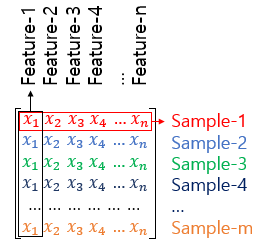)


<br>

<br>

## 가중치와 편향 행렬의 크기 결정
- **행렬 곱셈의 두 가지 주요한 조건 :**
  * 두 행렬의 곱 J × K이 성립되기 위해서는 행렬 J의 열의 개수와 행렬 K의 행의 개수는 같아야 한다.
  * 두 행렬의 곱 J × K의 결과로 나온 행렬 JK의 크기는 J의 행의 개수와 K의 열의 개수를 가진다

<br>

- 이로부터 입력과 출력의 행렬의 크기로부터 가중치 행렬 $W$와 편향 행렬 $B$의 크기를 탐색 가능
- **독립 변수 행렬을 $X$, 종속 변수 행렬을 $Y$라고 하였을 때, 이때 행렬 $X$를 입력 행렬(Input Matrix), $Y$를 출력 행렬(Output Matrix)**

  ![matrix1[1].PNG]()

- 입력 행렬의 크기와 출력 행렬의 크기로부터 $W$행렬과 $B$행렬의 크기를 추론

  ![matrix2[1].PNG](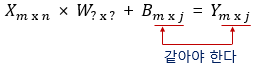)

- 행렬의 덧셈에 해당되는 $B$행렬은 $Y$행렬의 크기에 영향을 주지 않음 $→$  그러므로 $B$행렬의 크기는 $Y$행렬의 크기와 동일

  ![matrix3[1].PNG](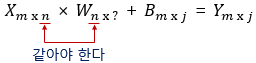)

- 행렬의 곱셈이 성립되려면, 행렬의 곱셈에서 앞에 있는 행렬의 열의 크기와 뒤에 있는 행렬의 행의 크기는 같아야 함. 
- **그러므로 입력 행렬 $X$로부터 $W$행렬의 행의 크기가 결정**

  ![matrix4[1].PNG](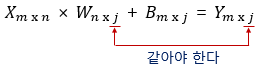)

<br>

<br>


# 다중 분류

<br>

<br>

## 소프트맥스 회귀(Softmax Regression)

<br>

## 소프트맥스 함수(Softmax function)
- **소프트맥스 함수는 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정**

<br>

### 소프트맥스 함수의 이해
- **k차원의 벡터에서 i번째 원소를 $z_i$, i번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 하였을 때**, 소프트맥스 함수는 다음과 같이 정의

$$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$$

<br>



---

<br>

- 예 :  k=3일 때, 3차원 벡터 $z=[z_{1}\ z_{2}\ z_{3}]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 반환
  -  **$p_{1}, p_{2}, p_{3}$ 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며, 각각 0과 1사이의 값으로 총 합은 1**
$$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$$

  <br>

  ![softmax1_final_final_ver[1].PNG](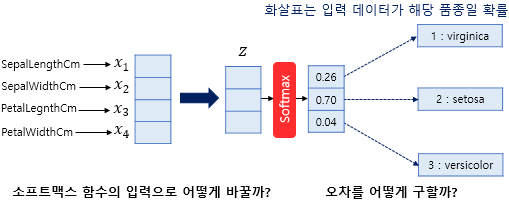)

- 그림에서 하나의 샘플 데이터는 4개의 독립 변수
를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미
- **그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 함**
- **샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법** : 
  - 소프트맥스 함수의 입력 벡터 $z$의 차원수만큼 결과값이 나오도록 가중치 곱을 진행
  - 아래 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경

  ![softmaxbetween1and2[1].PNG](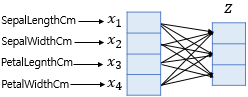)

<br>

- 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가지기에. 이 각각은 특정 클래스가 정답일 확률을 나타냄
- **소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현**
  - e.g 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0 1 0]
  - 이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우
  - **이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용**

  ![softmax2_final[1].PNG](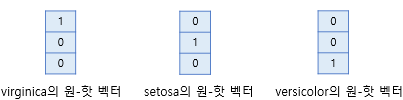)

    <br>
  
  ![softmax4_final[1].PNG](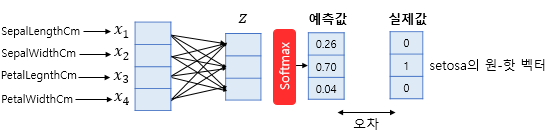)

 - 선형회귀, 로지스틱 회귀와 동일하게, 오차로부터 가중치와 편향 업데이트

  ![softmax6_final_2ldz1s0[1].PNG](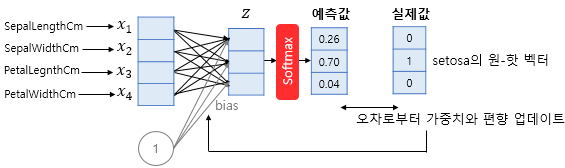)

<br>

- 소프트맥스 회귀를 벡터와 행렬 연산으로 이해:
  - 입력을 특성(feature)의 수만큼의 차원을 가진 입력 벡터 
라고 하고, 가중치 행렬을 $W$, 편향을 $B$라고 하였을 때

  ![softmax7[1].PNG](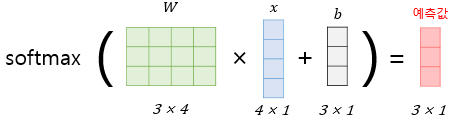)

<br>

<br>

### 원-핫 벡터의 무작위성
-  실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, **대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법**
- 다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요
- 직관적인 레이블링 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는 것 : 
  - e.g 분류해야 할 레이블이 {red, green, blue}와 같이 3개라면 각각 0, 1, 2로 레이블

<br>

#### **하지만 일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현**

* 3개의 클래스가 존재하는 문제에서, 레이블은 정수 인코딩을 사용하여 각각 1, 2, 3을 부여
* **손실 함수로 MSE를 사용하면 정수 인코딩이 오류를 불러일으킬 수 있음**

$$Loss\ function = \frac{1}{n} \sum_i^{n} \left(y_{i} - \hat{y_{i}}\right)^2$$

  - 실제값이 2일때 예측값이 1이었다면 MSE는
  $$(2-1)^{2} = 1$$

  - 실제값이 3일때 예측값이 1이었다면 MSE는

  $$(3-1)^{2} = 4$$

#### 즉, 2와 1 사이의 오차보다 3과 1의 오차가 더 큼
- **더 많은 클래스에 대해서 정수 인코딩을 수행했다면 이러한 오류가 더 커짐**

<br>

#### 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배
- **세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩했을 때, 각 클래스 간의 제곱 오차가 균등함**

$$((1,0,0)-(0,1,0))^{2} = (1-0)^{2} + (0-1)^{2} + (0-0)^{2} = 2$$

$$((1,0,0)-(0,0,1))^{2} = (1-0)^{2} + (0-0)^{2} + (0-1)^{2} = 2$$

<br> 

- **다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일**
- 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있음
  - **원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점도 존재**

<br>

<br>

## 비용 함수(Cost function)
- 소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용

<br>

### 크로스 엔트로피 함수
- $y$는 실제값을 나타내며, $k$는 클래스의 개수로 정의
- $y_j$는 실제값 원-핫 벡터의 $j$번째 인덱스를 의미하며, $p_j$는 샘플 데이터가 $j$번째 클래스일 확률을 의미
  - 표기에 따라서 $\hat{y_j}$로 표현

$$Cost = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$$

<br>

- **$\hat{y}$가 $y$를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 됨. 즉, $-\sum_{j=1}^{k}y_{j}\ log(p_{j})$ 이 값을 최소화하는 방향으로 학습**
- 이를 $n$개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는

$$Cost = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$$

<br>

- **$k=2$ (이진분류)일 때, 비용함수는 로지스틱 회귀에서의 크로스 엔트로피 함수와 동일** 

$$-(\sum_{i=1}^{2}y_{i}\ log\ p_{i})$$